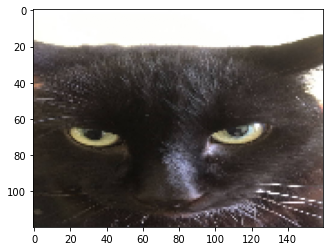

In [3]:
img_path = '/Users/jiji/Downloads/photo_2021-10-08 12.57.13.jpeg'
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)/255.
img = cv2.resize(img, (img.shape[0]//8, img.shape[1]//8))

plt.imshow(img)
# img = img.reshape(-1, 3)

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import seaborn as sns
import os
# sns.set()
# from skimage import color


class ImgCompress:
    
    def __init__(self, image, n_clusters, save_dir, img_name, algo):

        self.image = image  # range [0, 1] RGB img
        # self.image = color.rgb2lab(image)
        self.n_clusters = n_clusters
        self.save_dir = save_dir
        if os.path.exists(self.save_dir) is False:
            os.mkdir(self.save_dir)
        self.img_name = img_name
        self.save_dir = os.path.join(self.save_dir, self.img_name)
        if os.path.exists(self.save_dir) is False:
            os.mkdir(self.save_dir)
        # preparing data, using pixel coordinates as additional features
#         ind = np.indices(self.image.shape[:2]).transpose(1,2,0)
#         self.features = np.dstack((ind, self.image)).reshape(-1, 5)
        
        # Delete this
        self.features = self.image.reshape(-1,3)
        
        self.x, self.y, self.z = self.image.shape
        
        # using KMeans to cluster our data to n_clusters
        if algo=='KMEANS':
            clustered_im = cluster.KMeans(n_clusters,
                                      random_state=42
                                      )
        elif algo=='DBSCAN':
            clustered_im = cluster.DBSCAN()
            
        clustered_im.fit(self.features)
        self.clusterer = clustered_im
        
        
#         self.cluster_centers = clustered_im.cluster_centers_
        # self.cluster_centers = color.lab2rgb(self.cluster_centers[None, ...]).squeeze()
#         self.cl_centers_rgb = (self.cluster_centers * 255.).astype(np.uint8)
#         self.save_colors()
#         self.save_palette()
#         self.cluster_labels = clustered_im.labels_

        
#         self.image_compressed = self.image_compression(save=True)
   
    def image_compression(self, save=True):
        # replacing pixel colors with corresponding cluster centroid's colors
        # and returning to the original size
#         img_compressed = self.cluster_centers[:,2:5][self.cluster_labels].astype('uint8')
        img_compressed = self.cluster_centers[self.cluster_labels]
        image_compressed = img_compressed.reshape(self.x, self.y, self.z)
        if save == True:
            file_dir = os.path.join(self.save_dir, self.img_name + '_'+ str(self.n_clusters) + 'colors.png')
            plt.imsave(file_dir, image_compressed)
        return image_compressed

  
    def compare_images(self):
        # plotting original vs compressed
        fig, axes = plt.subplots(1, 2, figsize = (10, 5))
        axes[0].imshow(self.image)
        axes[0].set_title('Original Image')
        axes[1].imshow(self.image_compressed)
        axes[1].set_title('Compressed Image with {} colors'.format(self.n_clusters))
        for ax in axes:
            ax.axis('off')
        
    def compare_memory(self):
        print('Original image size: {} kB'.format(round(os.path.getsize(self.name)/1024,2)))
        print('Compressed image size: {} kB'.format(round(os.path.getsize('compressed.jpg')/1024, 2)))
        
        
    def change_n_clusters(self, n_clusters):
        # changing number of used clusters(colors) if needed
        self.n_clusters=n_clusters
        print('New  number of clusters is set to {}.'.format(n_clusters))
        clustered_im = cluster.KMeans(n_clusters)
        clustered_im.fit(self.features)
        
        self.cluster_centers = clustered_im.cluster_centers_
        self.cluster_labels = clustered_im.labels_
        
        self.image_compressed = self.image_compression()    
        
    def centroids_palette(self):
        # plotting centroids color palette
        color_palette = self.cluster_centers
        sns.palplot(color_palette, size=0.4)
        
        
    def get_closest_color(self, colors):
        """

        :param colors: [batch_size, 3]
        :return:
        """
        
        labels = self.clusterer.predict(colors)
        discrete_colors = self.cluster_centers[labels]
        assert discrete_colors.shape == colors.shape
        return labels, discrete_colors

    def save_colors(self):
        file_dir = os.path.join(self.save_dir, self.img_name + f'_{self.n_clusters}colorsRGB')
        np.save(file_dir, self.cl_centers_rgb)

    def save_palette(self):
        color_palette = self.cluster_centers
        # print('SAVE_DIR :', self.save_dir)
        # file_dir = self.save_dir + f'_{self.n_clusters}colors_palette'
        file_dir = os.path.join(self.save_dir, self.img_name + f'_{self.n_clusters}colors_palette')
        sns.palplot(color_palette, size=0.6)
        plt.savefig(file_dir)

In [7]:
compressor = ImgCompress(img, 3, '.', 'test_cat', algo='DBSCAN')

In [11]:
compressor.clusterer.fit

DBSCAN()

In [110]:
from sklearn.cluster import KMeans

In [156]:
mid_point = [0.89531535, 0.17450641]
h = .15
w = 1/30
theta = 0.37037
_h = np.array([0, h/2])
_w = np.array([w/2, 0])
mid_point = np.array(mid_point)


import numpy as np
rotation_M = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]
        ])

height_step = rotation_M @ _h
width_step = rotation_M @ _w


kuka_width = 300
kuka_height = 300
normalization = np.array([kuka_width, kuka_height])

<ipython-input-160-c23c7b228048>:19: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(r**2 - (x-x0)**2) + y0
<ipython-input-160-c23c7b228048>:20: RuntimeWarning: invalid value encountered in sqrt
  y2 = -np.sqrt(r**2 - (x-x0)**2) + y0


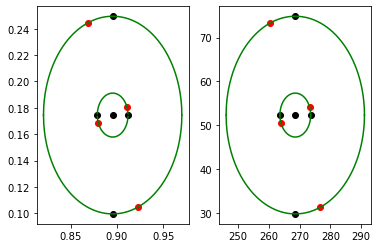

In [160]:
plt.subplot(1, 2, 1)
plt.scatter(*mid_point, c='black')
plt.scatter(*mid_point+_h, c='black')
plt.scatter(*mid_point-_h, c='black')
plt.scatter(*mid_point+_w, c='black')
plt.scatter(*mid_point-_w, c='black')
r = _h[1]
x0, y0 = mid_point

x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0

plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')

r = _w[0]
x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0
plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')


plt.scatter(*mid_point+height_step, c='red')
plt.scatter(*mid_point-height_step, c='red')
plt.scatter(*mid_point+width_step, c='red')
plt.scatter(*mid_point-width_step, c='red')


plt.subplot(1, 2, 2)
plt.scatter(*mid_point*normalization, c='black')
plt.scatter(*(mid_point+_h)*normalization, c='black')
plt.scatter(*(mid_point-_h)*normalization, c='black')
plt.scatter(*(mid_point+_w)*normalization, c='black')
plt.scatter(*(mid_point-_w)*normalization, c='black')


r = _h[1]*normalization[1]
x0, y0 = mid_point*normalization

x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0

plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')

r = _w[0]*normalization[0]
x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0
plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')

plt.scatter(*(mid_point+height_step)*normalization, c='red')
plt.scatter(*(mid_point-height_step)*normalization, c='red')
plt.scatter(*(mid_point+width_step)*normalization, c='red')
plt.scatter(*(mid_point-width_step)*normalization, c='red')



<ipython-input-152-2be38de76bed>:26: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(r**2 - (x-x0)**2) + y0
<ipython-input-152-2be38de76bed>:27: RuntimeWarning: invalid value encountered in sqrt
  y2 = -np.sqrt(r**2 - (x-x0)**2) + y0


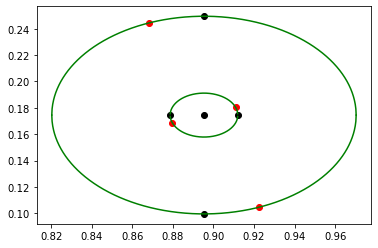

In [152]:
plt.scatter(*mid_point, c='black')
plt.scatter(*mid_point+_h, c='black')
plt.scatter(*mid_point-_h, c='black')
plt.scatter(*mid_point+_w, c='black')
plt.scatter(*mid_point-_w, c='black')


# plt.scatter(*mid_point, c='red')
plt.scatter(*mid_point+height_step, c='red')
plt.scatter(*mid_point-height_step, c='red')
# plt.scatter(*mid_point+width_step, c='red')
# plt.scatter(*mid_point-width_step, c='red')

r = _h[1]
x0, y0 = mid_point

x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0

plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')

r = _w[0]
x = np.linspace(x0 - r, x0 + r, 1000)
y1 = np.sqrt(r**2 - (x-x0)**2) + y0
y2 = -np.sqrt(r**2 - (x-x0)**2) + y0
plt.plot(x, y1, c='green')
plt.plot(x, y2, c='green')


plt.scatter(*mid_point+width_step, c='red')
plt.scatter(*mid_point-width_step, c='red')

In [112]:
import json
path0='/Users/jiji/Downloads/batch_0.txt'
path1='/Users/jiji/Downloads/batch_1.txt'
path2='/Users/jiji/Downloads/batch_2.txt'
path3='/Users/jiji/Downloads/batch_3.txt'
path4='/Users/jiji/Downloads/batch_4.txt'
path5='/Users/jiji/Downloads/batch_5.txt'



with open(path0, 'r') as f:
    b0 = json.load(f)
b0 = b0['commands']
b0 = [c['data'] for c in b0 if c['action']=='spline_stroke']

with open(path1, 'r') as f:
    b1 = json.load(f)
b1 = b1['commands']
b1 = [c['data'] for c in b1 if c['action']=='spline_stroke']

with open(path2, 'r') as f:
    b2 = json.load(f)
b2 = b2['commands']
b2 = [c['data'] for c in b2 if c['action']=='spline_stroke']

with open(path3, 'r') as f:
    b3 = json.load(f)
b3 = b3['commands']
b3 = [c['data'] for c in b3 if c['action']=='spline_stroke']


with open(path4, 'r') as f:
    b4 = json.load(f)
b4 = b4['commands']
b4 = [c['data'] for c in b4 if c['action']=='spline_stroke']

with open(path5, 'r') as f:
    b5 = json.load(f)
b5 = b5['commands']
b5 = [c['data'] for c in b5 if c['action']=='spline_stroke']

In [71]:
path = './batches/joker/batch_0.txt'


with open(path, 'r') as f:
    b0 = json.load(f)
b0 = b0['commands']
b0 = [c['data'] for c in b0 if c['action']=='spline_stroke']

In [81]:
(p['p0']['x'], 
p['p0']['y'], 
p['p1']['x'], 
p['p1']['y'], 
p['p2']['x'], 
p['p2']['y'])

(251.63252738151274,
 188.29530533449238,
 243.32301020622253,
 179.99999523162842,
 75489.75821445382,
 37659.061066898474)

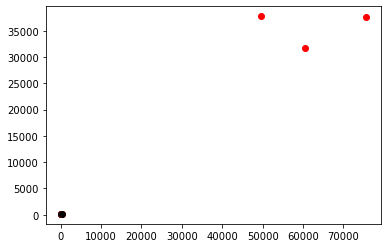

In [75]:
import matplotlib.pyplot as plt
 
for p in b0:
#     x = [p['p0']['x'], p['p1']['x'], p['p2']['x']]
#     y = [p['p0']['y'], p['p1']['y'], p['p2']['y']]
#     plt.plot(x, y)
    plt.scatter(p['p0']['x'], p['p0']['y'], color='red')
    plt.scatter(p['p1']['x'], p['p1']['y'], color='black')
    plt.scatter(p['p2']['x'], p['p2']['y'], color='red')

# for p in b1:
#     plt.scatter(p['p0']['x'], p['p0']['y'], color='black')
# for p in b2:
#     plt.scatter(p['p0']['x'], p['p0']['y'], color='black')
    
# for p in b3:
#     plt.scatter(p['p0']['x'], p['p0']['y'], color='black')
    
# for p in b4:
#     plt.scatter(p['p0']['x'], p['p0']['y'], color='black')


# for p in b5:
#     plt.scatter(p['p0']['x'], p['p0']['y'], color='black')



    

In [42]:
import argparse
import torch
import torch.optim as optim
import cv2
import pickle
import os
import time
import numpy as np

import utils
from painter import *
# from imitator import*
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [43]:
device

device(type='cuda', index=0)

In [48]:
args = {
    'train' : False,
    'img_path' : 'test_images/horse.jpg',
    'renderer' : 'oilpaintbrush',
    'canvas_color' : 'white',
    'canvas_size' : 512,
    'keep_aspect_ratio' : False,
    'max_m_strokes' : 30*15,
    'max_divide' : 4,
    'iterations_per_block' : 15*20,
    'beta_L1' : 1.0,
    'with_ot_loss' : False,
    'beta_ot' : 0.1,
    'net_G' : 'zou-fusion-net',
    'renderer_checkpoint_dir' : 'checkpoints_G_fix_w',
    'lr' : 0.005,
    'output_dir' : 'output',
    'disable_preview' : True,
    'max_num_epochs' : 400,
    'vis_dir' : 'val_out_G',
    'checkpoint_dir' : 'checkpoints_G_fix_w',
    'batch_size' : 64,
    'print_models' : False,
    'start_div' : 1,
    'replays' : 1,
    'kuka_width' : 300,  # in mm
    'kuka_height' : 300,  # in mm
    'x_shift' : 0.,  # in mm
    'y_shift' : 0.,  # in mm
    'n_colors': 8,
    'colors_dir' : 'colors',
    'save_video' : False,
    'max_w' : 0.1,
    'max_h' : 0.1,
    'video' : 'MP4V'
}

In [49]:
total_blocks = sum(i**2 for i in range(args['start_div'], args['max_divide']+1))
total_blocks

30

In [50]:
#!g1.1
def optimize_x(pt):

    real_img = None
    pt._load_checkpoint()
    pt.net_G.eval()

    print('begin drawing...')

    PARAMS = np.zeros([1, 0, pt.rderr.d], np.float32)

    if pt.rderr.canvas_color == 'white':
        # CANVAS_tmp = torch.ones([1, 3, 128, 128]).to(device)
        CANVAS_tmp = torch.ones([args['start_div']**2, 3, 128, 128]).to(device)
    else:
        # CANVAS_tmp = torch.zeros([1, 3, 128, 128]).to(device)
        CANVAS_tmp = torch.ones([args['start_div']**2, 3, 128, 128]).to(device)

    iters_per_block = args['iterations_per_block']
    iters_per_stroke = int(iters_per_block / pt.m_strokes_per_block)
    print(f'Iterations per stroke : {iters_per_stroke}')

    for pt.m_grid in range(args['start_div'], pt.max_divide + 1):
        for replay in range(0, args['replays']):
            pt.batch_id += 1

            pt.img_batch = utils.img2patches(pt.img_, pt.m_grid, pt.net_G.out_size, adder=0.0).to(device)
            pt.G_final_pred_canvas = CANVAS_tmp

            pt.initialize_params()
            pt.x_ctt.requires_grad = True
            pt.x_color.requires_grad = True
            pt.x_alpha.requires_grad = True
            pt.x_w.requires_grad = True
            pt.x_h.requires_grad = True
            utils.set_requires_grad(pt.net_G, False)

            pt.optimizer_x = optim.RMSprop([pt.x_ctt, pt.x_color, pt.x_alpha, pt.x_w, pt.x_h], lr=pt.lr, centered=True)
            pt.step_id = 0
            for pt.anchor_id in range(0, pt.m_strokes_per_block):
                pt.stroke_sampler(pt.anchor_id) # anchor_id stroke is sampled in all blocks

                for i in range(iters_per_stroke):
                    pt.G_pred_canvas = CANVAS_tmp

                    # update x
                    pt.optimizer_x.zero_grad()

                    pt.x_ctt.data = torch.clamp(pt.x_ctt.data, 0.1, 1 - 0.1)
                    pt.x_w.data = torch.clamp(pt.x_w.data, 0.02, args['max_w']*pt.m_grid)
                    pt.x_h.data = torch.clamp(pt.x_h.data, 0.02, args['max_h']*pt.m_grid)
                    # pt.x_w.data = torch.clamp(pt.x_w.data, 0.02, 0.9)
                    # pt.x_h.data = torch.clamp(pt.x_h.data, 0.02, 0.9)
                    pt.x_color.data = torch.clamp(pt.x_color.data, 0, 0.9)
                    pt.x_alpha.data = torch.clamp(pt.x_alpha.data, 0, 0.9)

                    pt._forward_pass() # pt.x is created  #pt.G_final_pred_canvas is updated
                    pt._drawing_step_states()
                    pt._backward_x()

                    pt.x_ctt.data = torch.clamp(pt.x_ctt.data, 0.1, 1 - 0.1)
                    pt.x_w.data = torch.clamp(pt.x_w.data, 0.02, args['max_w']*pt.m_grid)
                    pt.x_h.data = torch.clamp(pt.x_h.data, 0.02, args['max_h']*pt.m_grid)
                    # pt.x_w.data = torch.clamp(pt.x_w.data, 0.02, 1)
                    # pt.x_h.data = torch.clamp(pt.x_h.data, 0.02, 1)


                    pt.x_color.data = torch.clamp(pt.x_color.data, 0, 1)
                    pt.x_alpha.data = torch.clamp(pt.x_alpha.data, 0, 1)

                    pt.optimizer_x.step()
                    pt.step_id += 1
            # all strokes are already rendered on pt.G_final_pred_canvas
            v = pt._normalize_strokes(pt.x)  # from patch coords to img coords
            v = pt._shuffle_strokes_and_reshape(v)
            PARAMS = np.concatenate([PARAMS, v], axis=1)
            CANVAS_tmp = pt._render(PARAMS, PARAMS.shape[1] - v.shape[1], save_jpgs=True, save_video=args['save_video'])
            print(CANVAS_tmp.shape)
            # z=utils.patches2img(CANVAS_tmp, CANVAS_tmp.shape[0], 0.)
            # plt.imshow(CANVAS_tmp)
            # plt.show()

            # if pt.batch_id < 1:
            #     if replay == args['replays'] - 1:
            #         CANVAS_tmp = utils.img2patches(CANVAS_tmp, pt.m_grid + 1, pt.net_G.out_size, adder=0.0).to(device)
            #     else:
            #         CANVAS_tmp = utils.img2patches(CANVAS_tmp, pt.m_grid, pt.net_G.out_size, adder=0.0).to(device)

            # else:


            # РИСУЕМ НА РОБОТЕ ТУТ И ЖДЕМ ПОКА ОТРИСУЕТ, потом выполняем код дальше
            # В файле KukaLogJSON в конструкторе есть путь до JSON куда писать команды - там надо указать путь куда писать JSON для батча
            # Тут надо указать ожидание откуда ждать файл что батч готов чтобы код запустился дальше
            experiment_uuid = 'f6d6f542-9996-42a8-bde4-055d5c30437e'
            batch_id = pt.batch_id

            robot_output_json_path = '/media/files/Legacy_API/kuka_api_v1/experiments/experiment_{}'.format(experiment_uuid)
            result_filepath = os.path.join(robot_output_json_path, 'batch_{}_out.pkl'.format(batch_id))

            with open('./exp_image/img_{}.txt'.format(batch_id), 'w+') as f:
                # arr.reshape(arr.shape[0], -1)
                np.savetxt('./exp_image/img_{}.txt'.format(batch_id), CANVAS_tmp.reshape(CANVAS_tmp.shape[0], -1)) # f.write(CANVAS_tmp)

            # while not os.path.exists(result_filepath):
            #     time.sleep(1)

            result_data = None
            # with open(result_filepath, 'rb') as f:
            #     result_data = pickle.load(f)

            with open('./exp_image/img_{}.txt'.format(batch_id), 'rb') as f:
                #result_data = f.readlines()
                result_data = np.loadtxt('./exp_image/img_{}.txt'.format(batch_id)).reshape(CANVAS_tmp.shape)

            # result_image = result_data['image']
            result_image = result_data

            # result_image = utils.preproc_camera_image(result_image)

            real_img = result_image
            # real_img_batch = utils.img2patches(real_img, pt.m_grid, pt.net_G.out_size, adder=0.0).to(device)
            CANVAS_tmp = real_img
            if replay == args['replays'] - 1:
                CANVAS_tmp = utils.img2patches(CANVAS_tmp, pt.m_grid + 1, pt.net_G.out_size, adder=0.0).to(device)
            else:
                CANVAS_tmp = utils.img2patches(CANVAS_tmp, pt.m_grid, pt.net_G.out_size, adder=0.0).to(device)


    pt._save_stroke_params(PARAMS)
    final_rendered_image = real_img #pt._render(PARAMS, save_jpgs=True, save_video=True)

    return final_rendered_image

initialize network with normal
Strokes per block : 15
loading renderer from pre-trained checkpoint...
begin drawing...
Iterations per stroke : 20
torch.Size([1, 3, 128, 128])
torch.Size([1, 3, 128, 128])
iteration step 0, G_loss: 0.00000, step_acc: 4.41699, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 1, G_loss: 0.53053, step_acc: 4.40988, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 2, G_loss: 0.53053, step_acc: 4.41721, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 3, G_loss: 0.53005, step_acc: 4.42684, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 4, G_loss: 0.52927, step_acc: 4.42702, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 5, G_loss: 0.52927, step_acc: 4.42481, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 6, G_loss: 0.52968, step_acc: 4.42466, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 7, G_loss: 0.52954, step_acc: 4.42710, grid_scale: 1 / 4, strokes: 1 / 15
iteration step 8, G_loss: 0.52946, step_acc: 4.42528, grid_scale: 1 / 4, strokes: 1 

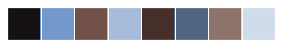

In [51]:
pt = ProgressivePainter(args=args)
final_rendered_image = optimize_x(pt)

In [52]:
pt.batch_id

3